# Halo Mass Function emulator tutorial

## Basic usage

### Initialization

Start by importing the `HMFEmulator` class from the `halo_mass_function` module.

In [1]:
from emantis.halo_mass_function import HMFEmulator

import numpy as np
import matplotlib.pyplot as plt

The HMF emulator supports different halo definitions and cosmological models. In order to initialize an instance of the `HMFEmulator` class you need to specify the cosmological model with the `model` parameter and the type of halo with the `mass_def`.

Possible choices for the `model` parameter are:

- 'wCDM': dark energy with constant equation of state $w$,
- 'fR': $f(R)$ modified gravity using the Hu & Sawicki model (limited to $n$=1).

Possible choices for `mass_def` are:

- For Friend-of-Friends (FoF) haloes, parameterized by the linking length parameter: 'b0.2'
- For Spherical Overdensity (SO) haloes, parameterized by the critical overdensity threshold: '200c', '500c', '1000c'.

For instance, if you want to initialize an emulator for the FoF HMF in $w$CDM:

In [2]:
emu_hmf_wCDM = HMFEmulator(model = "wCDM", mass_def="b0.2")

If you want to initialize an emulator for the SO HMF at $\Delta_{\rm c}=200$ in $f(R)$ gravity:

In [3]:
emu_hmf_fR = HMFEmulator(model = "fR", mass_def="200c")

### Cosmological parameters, scale factor and halo mass ranges

The emulator provides some utility methods to inspect the supported range in terms of cosmological parameters, scale factor and halo mass.
Indeed, these might vary from one type of cosmological model to another, and from one halo definition to another.

The cosmological parameters that you need to provide to the emulator in order to get predictions depends on the type of cosmological model that you are considering. You can get the names and ranges of each cosmological parameter supported by the current emulator with the `params_range` attribute.

For instance, the required cosmological parameters and their allowed range in $w$CDM are:

In [4]:
emu_hmf_wCDM.params_range

{'Omega_b': {'min_value': 0.037, 'max_value': 0.062},
 'Omega_m': {'min_value': 0.155, 'max_value': 0.465},
 'h': {'min_value': 0.55, 'max_value': 0.85},
 'sigma8': {'min_value': 0.6083, 'max_value': 1.014},
 'n_s': {'min_value': 0.72, 'max_value': 1.2},
 'w': {'min_value': -1.5, 'max_value': -0.5}}

While in $f(R)$ gravity they are:

In [5]:
emu_hmf_fR.params_range

{'Omega_b': {'min_value': 0.037, 'max_value': 0.062},
 'Omega_m': {'min_value': 0.155, 'max_value': 0.465},
 'h': {'min_value': 0.55, 'max_value': 0.85},
 'sigma8_lcdm': {'min_value': 0.6083, 'max_value': 1.014},
 'n_s': {'min_value': 0.72, 'max_value': 1.2},
 'logfR0': {'min_value': 4, 'max_value': 7}}

:::{note}
The main differences in terms of input cosmological parameters between the $f(R)$ gravity and $w$CDM emulators are the `logfR0` and `w` parameters, but also the difference between `sigma8_lcdm` and `sigma8`. In the case of $f(R)$ gravity, the parameter `sigma8_lcdm` corresponds to $\sigma_8$ assuming general relativity, which in practice corresponds to a $\Lambda$CDM cosmology with identical cosmological parameters except for $f_{R_0}$. In the case of $w$CDM, the parameter `sigma8` corresponds to the usual $\sigma_8$.
:::

:::{note}
The ``logfR0`` parameter refers to the value of $-\log_{10}{|f_{R_0}|}$.
:::

Alternatively, you can use the `range` method to get the range of a single parameter:

In [6]:
emu_hmf_fR.range("Omega_m")

(0.155, 0.465)

The same function can be used to get the scale factor range:

In [7]:
emu_hmf_fR.range("aexp")

(np.float64(0.3333), np.float64(1.0))

The supported halo mass range is slightly more complicated, since it depends on the particular scale factor.
In practice, the minimum halo mass is constant with the scale factor and only the maximum mass varies.

The same `range` function can provide the halo mass range, with the use of the extra parameter `aexp` specifying the scale factor:

In [8]:
# Mass range at z=0.
z = 0
mmin, mmax = emu_hmf_fR.range("mass_halo", aexp = 1/(1+z))
print(f'Mass range at z={z}: M_min={mmin:.2e}, M_max={mmax:.2e} [Msun/h]')

# Mass range at z=0.5.
z = 0.5
mmin, mmax = emu_hmf_fR.range("mass_halo", aexp = 1/(1+z))
print(f'Mass range at z={z}: M_min={mmin:.2e}, M_max={mmax:.2e} [Msun/h]')

# Mass range at z=1.
z = 1
mmin, mmax = emu_hmf_fR.range("mass_halo", aexp = 1/(1+z))
print(f'Mass range at z={z}: M_min={mmin:.2e}, M_max={mmax:.2e} [Msun/h]')

Mass range at z=0: M_min=1.00e+13, M_max=1.01e+15 [Msun/h]
Mass range at z=0.5: M_min=1.00e+13, M_max=4.96e+14 [Msun/h]
Mass range at z=1: M_min=1.00e+13, M_max=2.69e+14 [Msun/h]


### Getting predictions

Let's get halo mass function predictions for some values of the cosmological parameters, scale factor and halo mass. As an example, with consider the case of $f(R)$ gravity and the halo mass function for SO haloes with a critical overdensity threshold of $\Delta_{\rm c}=200$. The emulator predicts the HMF in the form $\mathrm{d}n/\mathrm{dln}M_h$, where $M_h$ is the halo mass in units of $h^{-1}M_\odot$.

In [9]:
# Initialise emulator.
emu_hmf_fR = HMFEmulator(model = "fR", mass_def="200c")

# Define the scale factor.
aexp = 1

# The cosmological parameters need to be provided in the form of a dictionary, with one entry for each supported parameter.
cosmo_params = {
    "Omega_m": 0.31,
    "Omega_b": 0.048,
    "h": 0.67,
    "n_s": 0.96,
    "sigma8_lcdm": 0.81,
    "logfR0": 5
}

# Generate an array of halo masses covering the whole emulator range at the given scale factor.
mass_min, mass_max = emu_hmf_fR.range("mass_halo", aexp=aexp)
masses = np.geomspace(mass_min, mass_max, 20)

# And finally get the predictions.
hmf = emu_hmf_fR.predict_hmf(masses, cosmo_params, aexp)

e-MANTIS:hmf:200c:aexp_1.0 Training the emulator...
e-MANTIS:hmf:200c:aexp_1.0 ...training completed.


Notice the message saying that the emulator is training itself.
The emulator predictions are based on a finite number of scale factor nodes for which simulation data is available.
The emulator needs to train itself at each scale factor node.
This only needs to be done once per emulator instance and scale factor node.

While predictions are requested at different scale factors, the emulator will do the necessary training on the fly.

It is possible to turn off/on these messages at any time with the `verbose` attribute:

In [10]:
emu_hmf_fR.verbose

True

Now we plot the predictions.

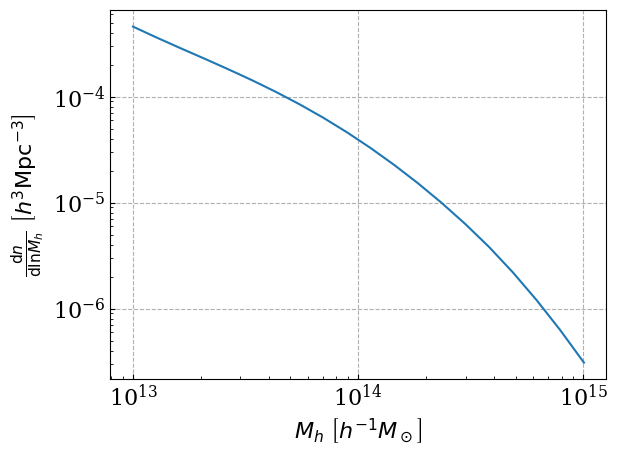

In [11]:
# Plot the HMF predictions.
plt.plot(masses, hmf)

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$M_{h} \ \left[h^{-1}M_\odot\right]$')
plt.ylabel(r'$\frac{\mathrm{d}n}{\mathrm{dln}M_{h}} \ \left[h^3\mathrm{Mpc}^{-3}\right]$')

plt.grid(True, linestyle='--')
plt.show()

The emulator is able to provide an estimation of the emulation uncertainty as a function of mass, redshift and cosmological parameters.
This can be activated with the optional argument `return_std` of the `predict` function.
Activating this option slows down a bit the emulator, which is why it is deactivated by default.
The prediction uncertainty is given in terms of its standard deviation.

In [12]:
hmf, hmf_std = emu_hmf_fR.predict_hmf(masses, cosmo_params, aexp, return_std=True)

Notice that his time, no emulator training was required.

Now we can plot the relative uncertainty predicted by the emulator itself.

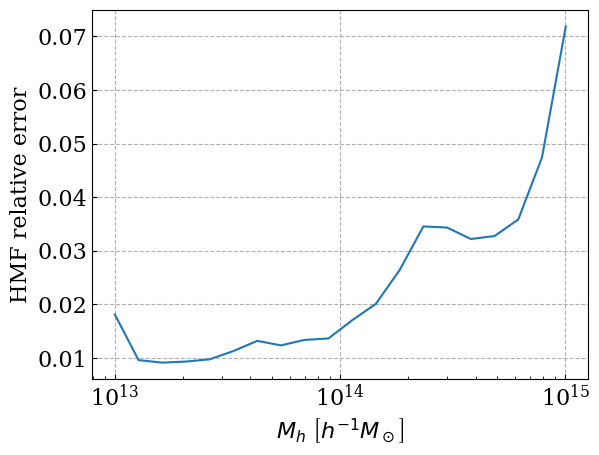

In [13]:
# Plot the HMF prediction relative uncertainty.
plt.plot(masses, hmf_std / hmf)

plt.xscale('log')
#plt.yscale('log')

plt.xlabel(r'$M_{h} \ \left[h^{-1}M_\odot\right]$')
plt.ylabel(r'HMF relative error')

plt.grid(True, linestyle='--')
plt.show()

## Advanced usage

### Predictions for multiple cosmological parameters (vectorized mode)

It is possible to get predictions for multiple cosmological parameters at once.

In [14]:
# Initialise emulator.
emu_hmf_fR = HMFEmulator(model = "fR", mass_def="200c")

# Single scale factor.
aexp = 1

# Multiple cosmological parameters.

# This is an example of a dictionary giving three different sets of cosmological parameters,
# for different values of Omega_m and logfR0.

# The other parameters are fixed to the same value for the three sets.

cosmo_params = {
    "Omega_m": [0.25, 0.3, 0.4], # Pass multiple values with a list or a 1D array.
    "Omega_b": 0.045,
    "h": 0.7, # Some parameters can remain fixed to a single value. They will be repeated N times (in this example N=3).
    "n_s": 0.9,
    "sigma8_lcdm": 0.8,
    "logfR0": [4, 5, 6] # All cosmological parameters with multiple values must have the same number of values.
}

# Generate array with halo mass values covering the whole range at the given scale factor.
mass_min, mass_max = emu_hmf_fR.range("mass_halo", aexp=aexp)
masses = np.geomspace(mass_min, mass_max, 20)

# Get predictions.
hmf = emu_hmf_fR.predict_hmf(masses, cosmo_params, aexp)

# Print shape of prediction array.
print("\n Shape of the output prediction array: ", hmf.shape)

e-MANTIS:hmf:200c:aexp_1.0 Training the emulator...
e-MANTIS:hmf:200c:aexp_1.0 ...training completed.

 Shape of the output prediction array:  (3, 20)


The returned array has now two dimensions. The first one corresponds to each set of cosmological parameters
and the last one to the halo masses. The same values of halo masses are used for each set of cosmological parameters.

Now we can plot the predicted halo mass functions for the different cosmological models.

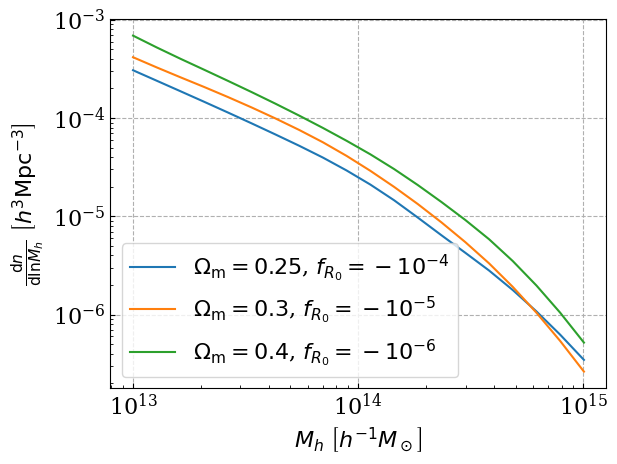

In [15]:
# Let's plot all this.

for i in range(hmf.shape[0]):

    plt.plot(masses, hmf[i], label=fr"$\Omega_\mathrm{{m}}={cosmo_params['Omega_m'][i]}$, $f_{{R_{{0}}}}=-10^{{-{cosmo_params['logfR0'][i]}}}$")

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$M_{h} \ \left[h^{-1}M_\odot\right]$')
plt.ylabel(r'$\frac{\mathrm{d}n}{\mathrm{dln}M_{h}} \ \left[h^3\mathrm{Mpc}^{-3}\right]$')

plt.grid(True, linestyle='--')
plt.legend()
plt.show()

:::{note}
Getting predictions for N cosmological models at once is significantly faster than calling the `predict` function N times for a single model at a time.
:::

### Predictions for multiple scale factors

It is also possible to get predictions for multiple scale factors at once. However, the same halo mass values (and cosmological parameters) are used at each redshift. This mean that the supported mass range is limited by the lowest scale factor.

In [16]:
# Initialise emulator.
emu_hmf_fR = HMFEmulator(model = "fR", mass_def="200c")

# Multiple scale factors.
aexp_array = [0.8, 1]

# Multiple cosmological models (same as before). 
cosmo_params = {
    "Omega_m": [0.25, 0.3, 0.4],
    "Omega_b": 0.045,
    "h": 0.7,
    "n_s": [0.9],
    "sigma8_lcdm": 0.8,
    "logfR0": [4, 5, 6]
}

# Be careful with the halo masses: you need to provide masses that are compatible with the range of all requested scale factors.
mass_min = np.max([emu_hmf_fR.range("mass_halo", aexp=aexp_array[0])[0], emu_hmf_fR.range("mass_halo", aexp=aexp_array[1])[0]])
mass_max = np.min([emu_hmf_fR.range("mass_halo", aexp=aexp_array[0])[1], emu_hmf_fR.range("mass_halo", aexp=aexp_array[1])[1]])
masses = np.geomspace(mass_min, mass_max, 20)

# Get predictions.
hmf = emu_hmf_fR.predict_hmf(masses, cosmo_params, aexp_array)

# Print shape of prediction array.
print("\n Shape of the output prediction array: ", hmf.shape)

e-MANTIS:hmf:200c:aexp_0.8 Training the emulator...
e-MANTIS:hmf:200c:aexp_0.8 ...training completed.
e-MANTIS:hmf:200c:aexp_1.0 Training the emulator...
e-MANTIS:hmf:200c:aexp_1.0 ...training completed.

 Shape of the output prediction array:  (2, 3, 20)


The output array has now three dimensions, the first one corresponding to each scale factor, the second one to each set of cosmological parameters, and the last one to each halo mass.

We can now plot the predicted halo mass functions for the different cosmological models and at the different scale factors.

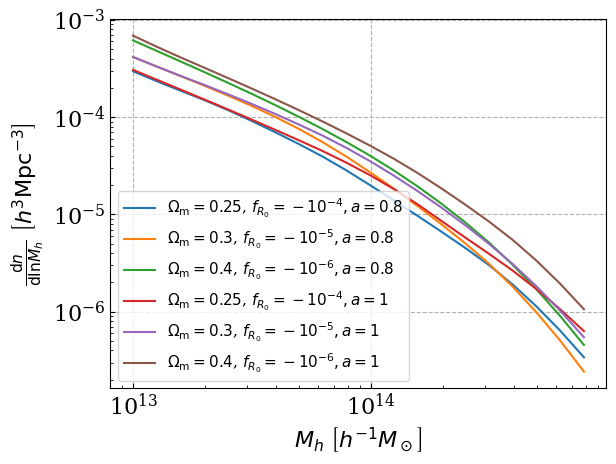

In [17]:
# Let's plot all this.
for i in range(hmf.shape[0]):
    for j in range(hmf.shape[1]):

        plt.plot(masses, hmf[i][j], label=fr"$\Omega_\mathrm{{m}}={cosmo_params['Omega_m'][j]}$, $f_{{R_{{0}}}}=-10^{{-{cosmo_params['logfR0'][j]}}}, a={aexp_array[i]}$")

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M_{h} \ \left[h^{-1}M_\odot\right]$')
plt.ylabel(r'$\frac{\mathrm{d}n}{\mathrm{dln}M_{h}} \ \left[h^3\mathrm{Mpc}^{-3}\right]$')
plt.grid(True, linestyle='--')
plt.legend(fontsize=11)
plt.show()

:::{note}
For more flexibility when it comes to the allowed mass range, for instance to explore different masses at each scale factor, you should simply call the `predict` function multiple times for a single scale factor at a time.
:::

### Mass range

The maximum mass supported by the emulator depends on the type of cosmological model, the type of dark matter halo, and the redshift.
You can easily visualize the maximum mass range as a function of redshift using the `range` method:

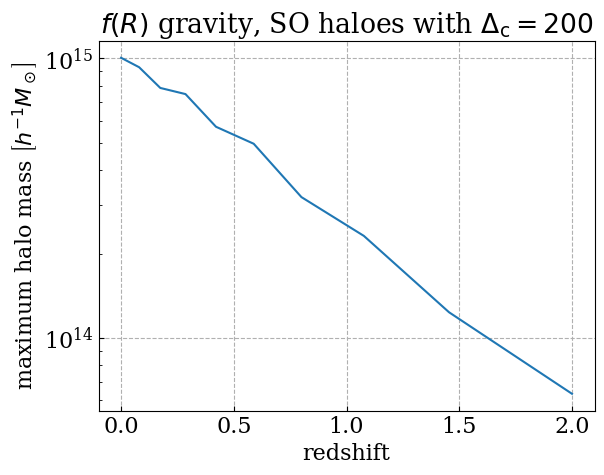

In [18]:
# Initialise emulator.
emu_hmf_fR= HMFEmulator(model = "fR", mass_def="200c")

# Generate scale factor values for the whole emulator range.
aexp_min, aexp_max = emu_hmf_fR.range("aexp")
aexp_values = np.linspace(aexp_min, aexp_max, 10)

# Compute the corresponding redshifts.
redshift_values = 1/aexp_values - 1

# Get the maximum halo mass at each redshift.
max_mass = [emu_hmf_fR.range("mass_halo", aexp=aexp)[1] for aexp in aexp_values]

# Plot the maximum mass as a function of redshift.
plt.plot(redshift_values, max_mass)

plt.yscale('log')

plt.xlabel('redshift')
plt.ylabel(r'maximum halo mass $\left[h^{-1}M_\odot\right]$')

plt.title(r'$f(R)$ gravity, SO haloes with $\Delta_{\rm c}=200$')

plt.grid(True, linestyle='--')
plt.show()

### Shape of the output array

The emulator computes a prediction array with shape `(n_aexp, n_cosmo, n_mass)`, where `n_aexp` is the number of scale factor values, `n_cosmo` is the number of sets of cosmological parameters, and `n_mass` is the number of halo mass values. Before outputting this prediction array, it proceeds to remove the dimensions which have a single element. However, in some scenarios you might want to have outputs of constant shape, independently of the number of scale factor, cosmological parameters, or halo mass values. This behaviour can be controlled with the `squeeze` argument of the `predict` function.

As an illustration, let's go back to the example of a single scale factor value, a single set of cosmological parameters and an array of multiple halo mass values.

In [19]:
# Initialise emulator.
emu_hmf_fR= HMFEmulator(model = "fR", mass_def="200c")

# Single scale factor.
aexp = 1

# Single set of cosmological parameters.
cosmo_params = {
    "Omega_m": 0.31,
    "Omega_b": 0.048,
    "h": 0.67,
    "n_s": 0.96,
    "sigma8_lcdm": 0.81,
    "logfR0": 5
}

# Multiple halo masses.
mass_min, mass_max = emu_hmf_fR.range("mass_halo", aexp=aexp)
masses = np.geomspace(mass_min, mass_max, 20)

Output shape with `squeeze=True` (default value):

In [20]:
hmf = emu_hmf_fR.predict_hmf(masses, cosmo_params, aexp, squeeze=True)
print("\n Shape of the output prediction array: ", hmf.shape)

e-MANTIS:hmf:200c:aexp_1.0 Training the emulator...
e-MANTIS:hmf:200c:aexp_1.0 ...training completed.

 Shape of the output prediction array:  (20,)


Output shape with `squeeze=False`:

In [21]:
hmf = emu_hmf_fR.predict_hmf(masses, cosmo_params, aexp, squeeze=False)
print("\n Shape of the output prediction array: ", hmf.shape)


 Shape of the output prediction array:  (1, 1, 20)


### Pre-training the emulator

As already shown earlier, the emulator needs to do some training at a given number of scale factor nodes before it is able to give predictions.
This training only needs to be done once per emulator instance and per scale factor node.
By default, the emulator will train itself at the required scale factor nodes on the fly.

It is possible to speed up the emulator training using multiple processes via the joblib package. This behaviour is controlled with the `n_jobs` attribute.
Note that additional parallelism might be used (via Numpy, SciPy, OpenMP) even when `n_jobs=1`, which is the default value.

In [22]:
# Initialise emulator.
emu_hmf_fR= HMFEmulator(model = "fR", mass_def="200c")

# Number of processes used to train the emulator.
emu_hmf_fR.n_jobs = 8

One can ask the emulator to do all necessary training at once using the `train_all` method.

In [23]:
emu_hmf_fR.train_all()

e-MANTIS:hmf:200c All aexp nodes will be trained.
e-MANTIS:hmf:200c:aexp_0.3333 Training the emulator...
e-MANTIS:hmf:200c:aexp_0.3333 ...training completed.
e-MANTIS:hmf:200c:aexp_0.365 Training the emulator...
e-MANTIS:hmf:200c:aexp_0.365 ...training completed.
e-MANTIS:hmf:200c:aexp_0.4 Training the emulator...
e-MANTIS:hmf:200c:aexp_0.4 ...training completed.
e-MANTIS:hmf:200c:aexp_0.4167 Training the emulator...
e-MANTIS:hmf:200c:aexp_0.4167 ...training completed.
e-MANTIS:hmf:200c:aexp_0.4444 Training the emulator...
e-MANTIS:hmf:200c:aexp_0.4444 ...training completed.
e-MANTIS:hmf:200c:aexp_0.4762 Training the emulator...
e-MANTIS:hmf:200c:aexp_0.4762 ...training completed.
e-MANTIS:hmf:200c:aexp_0.5 Training the emulator...
e-MANTIS:hmf:200c:aexp_0.5 ...training completed.
e-MANTIS:hmf:200c:aexp_0.5263 Training the emulator...
e-MANTIS:hmf:200c:aexp_0.5263 ...training completed.
e-MANTIS:hmf:200c:aexp_0.5556 Training the emulator...
e-MANTIS:hmf:200c:aexp_0.5556 ...training com

This emulator instance is now able to give predictions for any scale factor value within the emulation range without any further training.

### Emulation range exception

The emulator will raise `EmulationRangeError` if any of the requested parameters are outside the emulation range.
You can catch this exception to handle it in any suitable way.

In [24]:
from emantis.exceptions import EmulationRangeError

# Initialise emulator.
emu_hmf_fR= HMFEmulator(model = "fR", mass_def="200c")

# Input cosmological parameters.
cosmo_params = {
    "Omega_m": 0.31,
    "Omega_b": 0.048,
    "h": 0.9, # The parameter h is out of the emulation range.
    "n_s": 0.96,
    "sigma8_lcdm": 0.81,
    "logfR0": 5
}

try:
    hmf = emu_hmf_fR.predict_hmf(masses, cosmo_params, aexp)
except EmulationRangeError as e:
    print(e)

Input h (=0.9) is outside the emulation range (0.55 <= h <= 0.85).


The exception `EmulationRangeError` is a subclass of the python built-in exception `ValueError`. Therefore, it can also be catched using `ValueError`.